In [5]:
#Mount drive

import os, sys

class FileSystem:
  def __init__(self, colab_dir="PersonTracking", local_dir="./", data_dir="data"): # replace with dlav path
    IN_COLAB = 'google.colab' in sys.modules
    if (IN_COLAB):
      from google.colab import drive
      drive.mount('/gdrive')
      self.root_dir = os.path.join("/gdrive/My Drive/", colab_dir)
    else:
      self.root_dir = local_dir
    self.data_dir = data_dir
    self.change_directory = False

  def data_path(self, name):
    return os.path.join(self.data_dir, name) if self.change_directory else os.path.join(self.root_dir, self.data_dir, name)

  def path(self, name):
    return os.path.join("./", name) if self.change_directory else os.path.join("./", self.root_dir, name)

  def cd(self):
    %cd {self.root_dir}
    %ls
    self.change_directory = True

fs = FileSystem()
fs.cd()

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1xcANAd3HJkfxNCBAtjJOyodOgmX0iO8b/PersonTracking
'Input Output'/   reid-strong-baseline/       WeightsReid/
 pic/             VideoPersonTracking.ipynb   YOLOv3-pedestrian/
 reid.ipynb       vids/
 reidLib/         WeightsDetection/


(540, 960, 3)


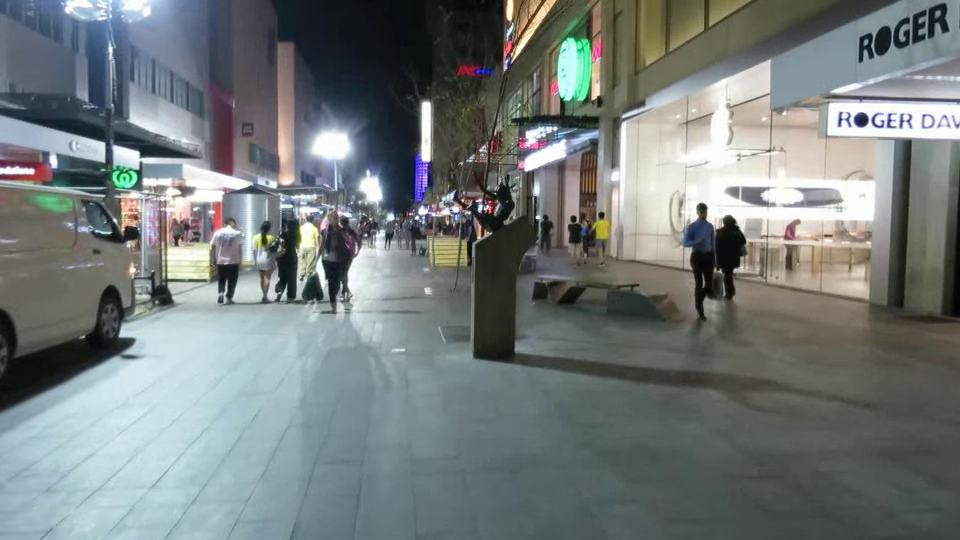

In [12]:
import cv2
import numpy as np
import os, sys
from IPython.display import HTML
from base64 import b64encode
from google.colab.patches import cv2_imshow

path ='vids/MOT16-10-raw.webm' 

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(path)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))


if (cap.isOpened()== False): 
  print("Error opening video stream or file")


fc = 0
ret = True


Images=np.array([])
while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

print(buf[0].shape)

cv2_imshow(buf[9])

# Check if camera opened successfully


In [7]:
!ls /content/drive/My\ Drive/PersonTracking/vids/

ls: cannot access '/content/drive/My Drive/PersonTracking/vids/': Transport endpoint is not connected
